# Common Setup

In [1]:
# common imports
import numpy as np
import os

In [2]:
np.random.seed(42)

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# to save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

In [5]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout
    plt.savefig(path, format='png', dpi=3000)

# Linear Regression Using Normal Equation

In [6]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [7]:
y

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995],
       [ 5.29307969],
       [ 5.82639572],
       [ 8.67878666],
       [ 6.79819647],
       [ 7.74667842],
       [ 5.03890908],
       [10.14821022],
       [ 8.46489564],
       [ 5.7873021 ],
       [ 5.18802735],
       [ 6.06907205],
       [ 5.12340036],
       [ 6.82087644],
       [ 6.19956196],
       [ 4.28385989],
       [ 7.96723765],
       [ 5.09801844],
       [ 5.75798135],
       [ 5.96358393],
       [ 5.32104916],
       [ 8.29041045],
       [ 4.85532818],
       [ 6.28312936],
       [ 7.3932017 ],
       [ 4.68275333],
       [ 9.53145501],
       [ 5.19772255],
       [ 4.64785995],
       [ 9.61886731],
       [ 7.87502098],
       [ 8.82387021],
       [ 5.88791282],
       [ 7.0492748 ],
       [ 7.91303719],
       [ 6.9424623 ],
       [ 4.69751764],
       [ 5.80238342],
       [ 5.34915394],
       [10.20785545],
       [ 6.34371184],
       [ 7

Saving Figure generated_plot_data


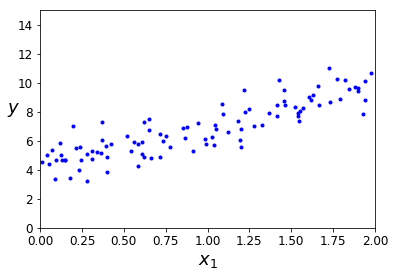

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_plot_data")
plt.show()

In [9]:
X_b=np.c_[np.ones((100,1)),X]
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

Let's compute the Normal Equation

In [10]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.21509616],
       [2.77011339]])

The actual function that we used to generate the data is y = 4 + 3x0 + Gaussian noise

We have hoped for theta_0 =4 and theta_1 = 3 instead of theta_0 = 4.215 and theta_1=2.770. Due to noise it is impossible to recover the excact paramters of the original function.

Now we can make predictions using theta_hat:

In [12]:
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [13]:
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [14]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Let's plot this model's predictions:

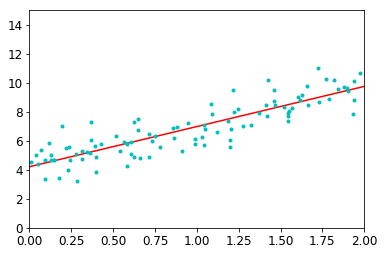

In [15]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"c.")
plt.axis([0,2,0,15])
plt.show()

The code for the figure in the book is below -

Saving Figure linear_model_predictions


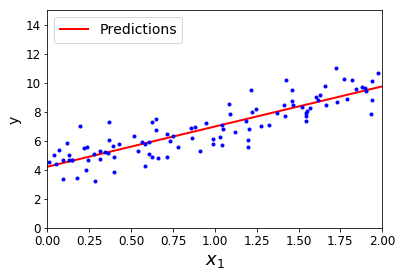

In [16]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label = "Predictions")
plt.plot(X, y , "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
save_fig("linear_model_predictions")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [18]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The Linear Regression class is based on scipy.linalg.lstsq() function

In [19]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [20]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# Linear Regression using batch gradient descent

In [21]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2 / m *X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [22]:
theta

array([[4.21509616],
       [2.77011339]])

In [23]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [24]:
theta_path_bgd = []

In [25]:
def plot_gradient_decent(theta, eta, theta_path=None):
    m=len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new,y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("y", rotation=0)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta={}$".format(eta),fontsize=19)

Saving Figure gradient descent plot


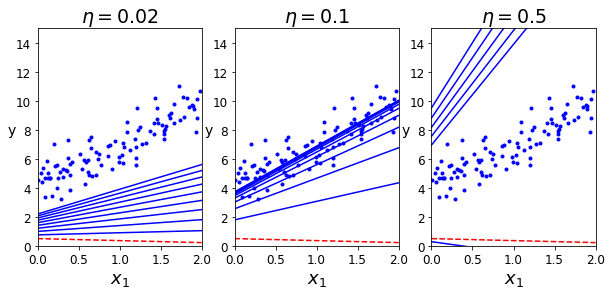

In [26]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_decent(theta,eta=0.02)

plt.subplot(132)
plot_gradient_decent(theta,eta=0.1,theta_path=theta_path_bgd)

plt.subplot(133)
plot_gradient_decent(theta,eta=0.5)

save_fig("gradient descent plot")
plt.show()

# Stochastic Gradient Descent

In [27]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving Figure sgd_plot


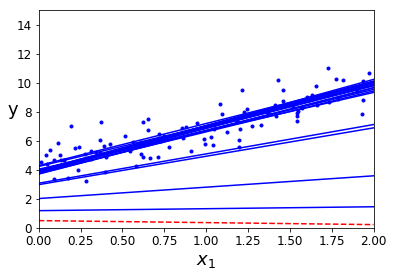

In [28]:
n_epochs =50
t0, t1 = 5, 50 # learning schedule hyperparmaters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) 

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize =18)
plt.axis([0,2,0,15])
save_fig("sgd_plot")
plt.show()

In [29]:
theta

array([[4.21076011],
       [2.74856079]])

In [30]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol= -np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [31]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

# Mini-Batch Gradient Descent

In [32]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200,1000
def learning_schedule(t):
    return t0 / (t+t1)

t=0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi= y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [33]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [34]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving Figure gradient descent path plots


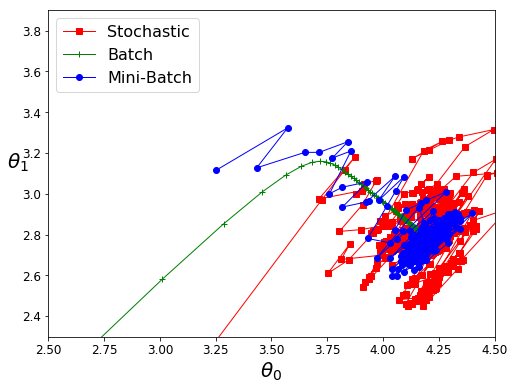

In [35]:
plt.figure(figsize=(8,6))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], "r-s", linewidth=1, label ="Stochastic")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], "g-+", linewidth=1, label ="Batch")
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], "b-o", linewidth=1, label ="Mini-Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
save_fig("gradient descent path plots")
plt.show()

# Polynomial Regression

In [36]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [37]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

Saving Figure quadratic_data_plot


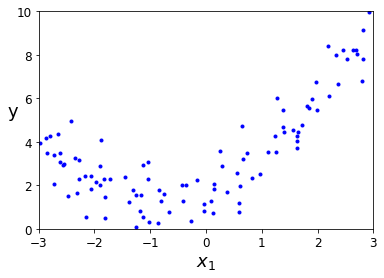

In [42]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation = 0, fontsize=18)
plt.axis([-3,3,0,10])
save_fig("quadratic_data_plot")
plt.show()

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [44]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving Figure quadratic_predictions_plot


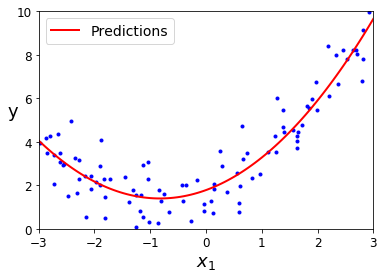

In [50]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3,3,0,10])
save_fig("quadratic_predictions_plot")
plt.show()

### Learning Curves

If you perform high-degree Polnomial Regression, you will likely fit the training data much better than Linear Regression. Let's apply 300 degree polynomial model to the preceding training data and compare the result with a pure linear model and a quadratic model (2nd degree polynomial)

Saving Figure high_degree_polynomials_plot


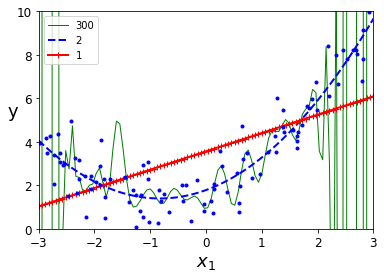

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2,1)):
    polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg),        
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label = str(degree), linewidth = width)
    
plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("y", rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.2,random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc = "upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize = 14)
    plt.ylabel("RMSE", fontsize = 14)        

Saving Figure underfitting_learning_curves_plot


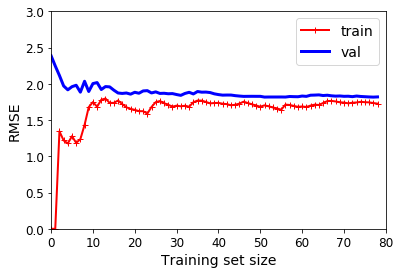

In [58]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0,80,0,3])
save_fig("underfitting_learning_curves_plot")
plt.show()

Now let's see the 10th degree polynomial on the same data

Saving Figure learning_curves_plot


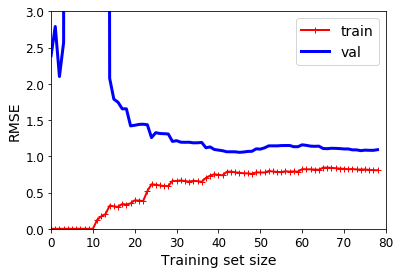

In [59]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg",LinearRegression()),    
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])
save_fig("learning_curves_plot")
plt.show()

# Regularized Linear Models